In [39]:
!wget i.imgur.com/mQ7R9al.jpg

--2020-08-16 13:10:21--  http://i.imgur.com/mQ7R9al.jpg
Resolving i.imgur.com (i.imgur.com)... 151.101.196.193
Connecting to i.imgur.com (i.imgur.com)|151.101.196.193|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://i.imgur.com/mQ7R9al.jpg [following]
--2020-08-16 13:10:21--  https://i.imgur.com/mQ7R9al.jpg
Connecting to i.imgur.com (i.imgur.com)|151.101.196.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 818754 (800K) [image/jpeg]
Saving to: ‘mQ7R9al.jpg.3’

mQ7R9al.jpg.3       100%[===================>] 799.56K   841KB/s    in 1.0s    

2020-08-16 13:10:23 (841 KB/s) - ‘mQ7R9al.jpg.3’ saved [818754/818754]



In [68]:
!wget https://image.freepik.com/free-vector/dotted-background-full-color_1017-4272.jpg

--2020-08-16 13:21:59--  https://image.freepik.com/free-vector/dotted-background-full-color_1017-4272.jpg
Resolving image.freepik.com (image.freepik.com)... 23.44.1.195, 2600:1413:1:49d::30ec, 2600:1413:1:4bb::30ec
Connecting to image.freepik.com (image.freepik.com)|23.44.1.195|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42168 (41K) [image/jpeg]
Saving to: ‘dotted-background-full-color_1017-4272.jpg’

dotted-background-f 100%[===================>]  41.18K  --.-KB/s    in 0.001s  

2020-08-16 13:21:59 (47.8 MB/s) - ‘dotted-background-full-color_1017-4272.jpg’ saved [42168/42168]



In [96]:
## Import thư viện
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

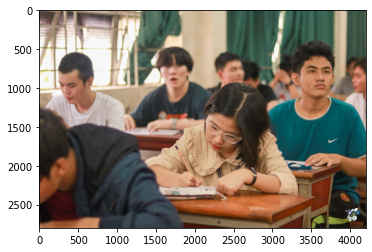

In [97]:
## Đọc ảnh và hiển thị ảnh
raw_img = Image.open('./mQ7R9al.jpg')
plt.imshow(raw_img)
img = np.array(raw_img)
img_height, img_width = img.shape[0], img.shape[1]
img = img.reshape( img_height*img_width, img.shape[2])



In [98]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm
    
    Inputs:
        img_1d : np.ndarray with shape=(height * width, num_channels)
            Original image in 1d array
        
        k_clusters : int
            Number of clusters
            
        max_iter : int
            Max iterator
            
        init_cluster : str
            The way which use to init centroids
            'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
            'in_pixels' --> centroid is a random pixels of original image
            
    Outputs:
        centroids : np.ndarray with shape=(k_clusters, num_channels)
            Store color centroids
            
        labels : np.ndarray with shape=(height * width, )
            Store label for pixels (cluster's index on which the pixel belongs)
    
    '''
    # Init tren img
    if init_centroids == 'in_pixels':
        centroids = img_1d[np.random.choice(img_1d.shape[0] , size = k_clusters , replace = False)]
    # Init random
    elif init_centroids == 'random':
        centroids = np.random.randint(0,255,size=(k_clusters,img_1d.shape[1]))
    # print(centroids)
    for i in range(max_iter):
        # Debug:
        # print("iter:", i)
        # Gan cho centroids
        d = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)
        labels = np.argmin(d , axis = 0)
        
        # Cap nhat mean
        means = []
        for k in range(k_clusters):
            means.append(img_1d[labels == k].mean(axis = 0))
        means = np.array(means)
        for i in range(k_clusters):
          if len(means[i]) != 0:
            centroids[i] = means[i]
    
    d = np.linalg.norm(img_1d - centroids[: , np.newaxis] , axis = 2)
    labels = np.argmin(d , axis = 0)
    return centroids, labels

# Mini test
****
Use it for test only few case.

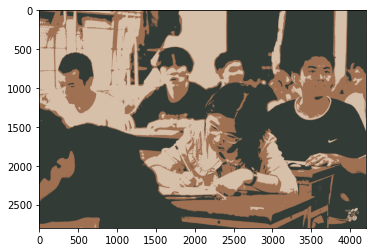

In [99]:
k_cluster = 3
img_ptest = img.copy()
centroids, labels = kmeans(img_ptest,k_cluster,10,'random')

## Gan label lai cho anh
for k in range(centroids.shape[0]):
  img_ptest[labels == k] = centroids[k]
  
img_ptest = img_ptest.astype("uint8")
img_ptest = img_ptest.reshape(img_height, img_width  , 3)
plt.imshow(img_ptest)

# Full test
****
Use it for full test in random, in_pixels

In [100]:
output_img = []
output_img.append(raw_img)

In [101]:
## Init in pixels test
for k_cluster in [3,5,7]:
  img_ptest = img.copy()
  centroids, labels = kmeans(img_ptest,k_cluster,5,'in_pixels')
  
  ## Gan label lai cho anh
  for k in range(centroids.shape[0]):
    img_ptest[labels == k] = centroids[k]
    
  img_ptest = img_ptest.astype("uint8")
  img_ptest = img_ptest.reshape(img_height, img_width  , 3)
  output_img.append(img_ptest.copy())

In [102]:
for k_cluster in [3,5,7]:
  ## Init random test
  img_rtest = img.copy()
  centroids, labels = kmeans(img_rtest,k_cluster,5,'random')

  ## Gan label lai cho anh
  for k in range(centroids.shape[0]):
      img_rtest[labels == k] = centroids[k]
  img_rtest = img_rtest.astype("uint8")
  img_rtest = img_rtest.reshape(img_height, img_width  , 3)
  output_img.append(img_rtest.copy())

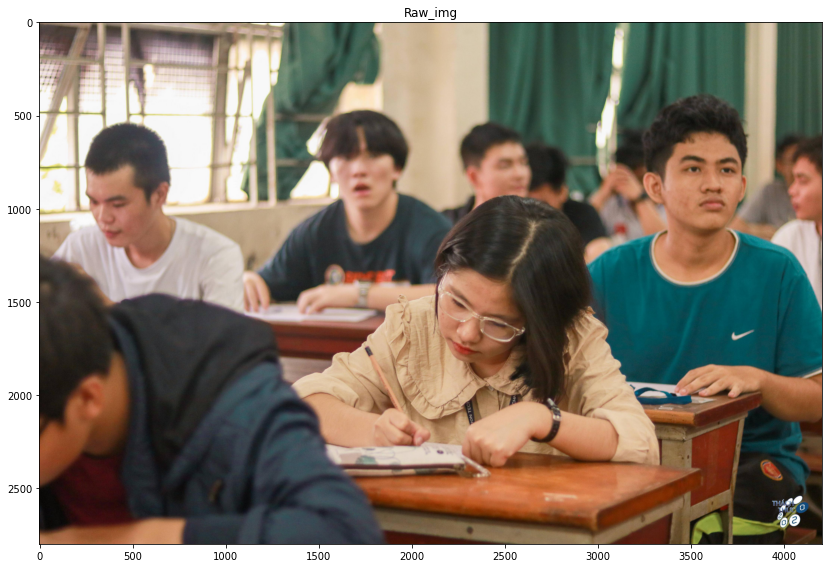

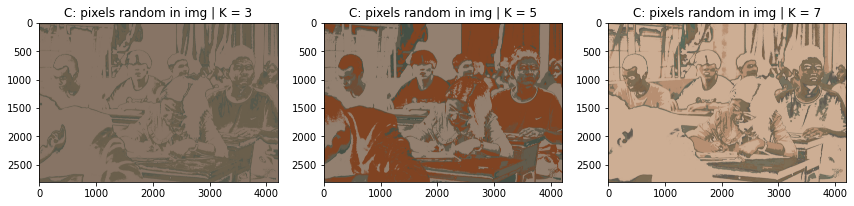

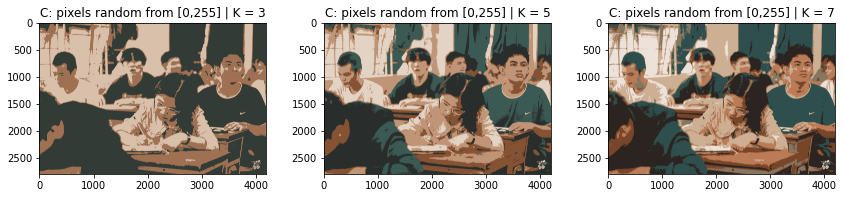

In [103]:
demo, axis = plt.subplots(1, 1, figsize = (12, 8))
axis.imshow(output_img[0])
axis.set_title('Raw_img')
plt.tight_layout();
demo, axis = plt.subplots(1, 3, figsize = (12, 8))
plot_iter = 1
for i,k in [(0,3),(1,5),(2,7)]:
  axis[i].set_title(f'C: pixels random in img | K = {k}')
  axis[i].imshow(output_img[plot_iter])
  plot_iter += 1
plt.tight_layout();

demo, axis = plt.subplots(1, 3, figsize = (12, 8))
for i,k in [(0,3),(1,5),(2,7)]:
  axis[i].set_title(f'C: pixels random from [0,255] | K = {k}')
  axis[i].imshow(output_img[plot_iter])
  plot_iter += 1
plt.tight_layout();